<html><center><h1>Урок 4</h1></center></html>

### Задание 1
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np

In [2]:
def roll():
    num = np.random.randint(0, 37)
    pockets = (range(1, 11), range(11, 19), range(19, 29), range(29, 37))
    if num:
        if num % 2 == 0:
            return num, 'black' if num in pockets[0] or pockets[2] else num, 'red'
        else:
            return num, 'red' if num in pockets[0] or pockets[2] else num, 'black'
    else:    
        return num, 'zero'
   

Выигрыш – 1, проигрыш – 0

In [3]:
def play(stake):
    num = roll()
    if type(stake) is str and stake == num[1]:
        return 1 
    elif type(stake) is int and stake == num[0]:
        return 1
    else:
        return 0

In [4]:
def win_rate(stake, tests=10000):
    games = [play(stake) for i in range(tests)]
    wins = [i for i in games if i == 1]
    return len(wins)/len(games)

In [5]:
win_rate('black')

0.4852

In [6]:
win_rate(2)

0.0259

In [7]:
1/37

0.02702702702702703

### Задание 2

1). Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки

Теорема сложения

In [8]:
toss = [np.random.randint(0, 2) for i in range(10000)]
tails = [i for i in toss if i == 1]
heads = [i for i in toss if i == 0]
len(tails)/len(toss) + len(heads)/len(toss)

1.0

2). Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9

In [9]:
x = np.array([[np.random.randint(0, 100) for i in range(1000)] for i in range(10)])

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

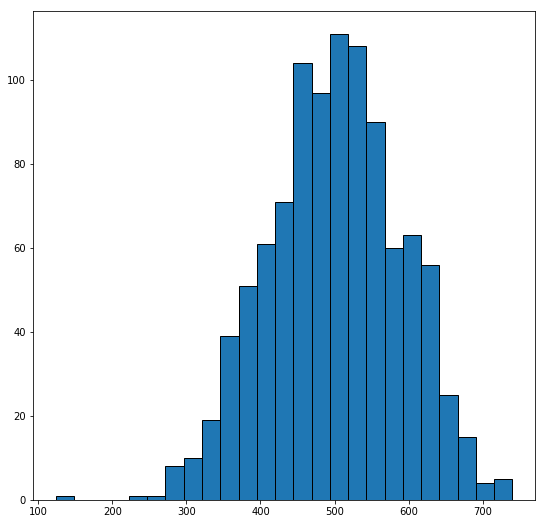

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9
plt.hist(np.sum(x, axis = 0), bins=25, ec='black')
plt.show()

### Задание 3

1). Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты

In [12]:
def by_testing(k, n, tests=10000):

    match = 0
    for i in range(tests):
        trials = np.random.randint(0, 2, n)
        match = match + 1 if np.sum(trials) == k else match

    return match/tests

In [13]:
by_testing(3, 10)

0.1223

$P_n(k)=C_{n}^k\cdot\frac{1}{2^n}$<br>
$C_{n}^k=\frac{n!}{k!\cdot(n-k)!}$

In [14]:
from math import factorial

def by_formula(k, n):
    C = factorial(n)/(factorial(n - k)*factorial(k))
    return C/2**n

In [15]:
by_formula(3, 10)

0.1171875

2). Повторите расчеты, взяв другие значения n и k

In [16]:
def compare(k, n):
    return f'Вероятность по формуле: {by_formula(k, n)}, вероятность на тестах: {by_testing(k, n)}'

In [17]:
compare(2, 4)

'Вероятность по формуле: 0.375, вероятность на тестах: 0.3793'

In [18]:
compare(5, 10)

'Вероятность по формуле: 0.24609375, вероятность на тестах: 0.2464'

In [19]:
compare(7, 20)

'Вероятность по формуле: 0.0739288330078125, вероятность на тестах: 0.0748'

### Задание 4
Повторите расчеты, взяв другие значения n и k

In [20]:
import itertools

Размещения

$A_n^k=\frac{n!}{(n-k)!}$

In [21]:
def permutations(k, n):
    elements = [i for i in range(n)]
    return len(list(itertools.permutations(elements, k)))

In [22]:
permutations(3, 8)

336

$C_{n}^k=\frac{n!}{k!\cdot(n-k)!}$

In [23]:
def combinations(k, n):
    elements = [i for i in range(n)]
    return len(list(itertools.combinations(elements, k)))

In [24]:
combinations(3, 8)

56

### Задание 5
Дополните код расчетом коэффициента корреляции x и y по формуле

$R=\frac{\sum{(x_i-x_m)(y_i-y_m)}}{\sqrt{\sum{(x_i-x_m)^2\sum{(y_i-y_m)}^2}}}$

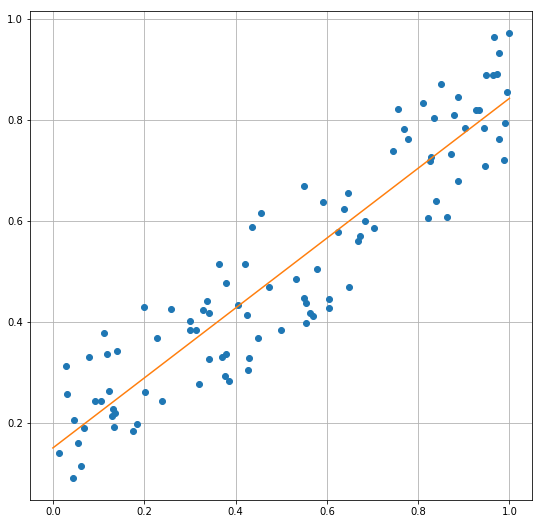

In [25]:
n = 100
r = 0.7
x = np.random.rand(n)
y = x*r + (1 - r)*np.random.rand(n)
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)**2 - n*np.sum(x**2))
b = (np.sum(y) - a*np.sum(x))/n
plt.plot(x, y, 'o')
plt.plot([0, 1], [b, a + b])
plt.grid()

In [26]:
x_nm = x - np.mean(x)
y_nm = y - np.mean(y)
R = np.sum(x_nm*y_nm)/np.sqrt(np.sum(x_nm**2)*np.sum(y_nm**2))
R

0.9270617292485227

In [27]:
np.corrcoef(x, y)[0][1]

0.9270617292485231

<html><center><h1>Урок 5</h1></center></html>

### Задание 1

1). Вектор – это частный случай матрицы 1хN и Nх1. Повторите материал для векторов, уделяя особое внимание умножению A·B

По сути скалярное произведение векторов – это умножение матрицы формы (1, n) на матрицу формы (n, 1). 
Если $C=A\cdot B$, то элементами нулевой строки $C$ являются суммы поэлеметного произведения нулевой строки $A$ на каждый из столбцов $B$.

In [28]:
A = np.random.rand(2, 3)
A

array([[0.79257459, 0.85905791, 0.38028468],
       [0.64733358, 0.76350746, 0.89932387]])

In [29]:
B = np.random.rand(3, 2)
B

array([[0.45696368, 0.89002932],
       [0.62690952, 0.18287263],
       [0.67172234, 0.51149659]])

In [30]:
A[0, 0]*B[0, 0] + A[0, 1]*B[1, 0] + A[0, 2]*B[2, 0] # нулевой элемент нулевой строки C

1.1561751008641805

In [31]:
A[0, 0]*B[0, 1] + A[0, 1]*B[1, 1] + A[0, 2]*B[2, 1] # первый элемент нулевой строки C

1.057027121233092

In [32]:
C = A @ B
C[0] # нулевая строка C

array([1.1561751 , 1.05702712])

Данная формула является частным случаем – в результате получаем одно число

$A(a_1, ... , a_n)\cdot B(b_1, ... , b_n)=a_1\cdot b_1 + ... a_n\cdot b_n$

In [33]:
A = np.random.rand(1, 5)
A

array([[0.81111824, 0.05846344, 0.16833797, 0.6245743 , 0.78977507]])

In [34]:
B = np.random.rand(5, 1)
B

array([[0.42713277],
       [0.04725108],
       [0.59763132],
       [0.21637008],
       [0.42046054]])

In [35]:
C = np.sum([A[0, i]*B[i, 0] for i in range(len(A[0, :]))])
C

0.91703013386929

In [36]:
A @ B

array([[0.91703013]])

Складываются матрицы одинаковой размерности, поэтом ранее заданную $B$ нужно транспонировать

In [37]:
A + B.T

array([[1.23825101, 0.10571451, 0.76596929, 0.84094438, 1.21023561]])

Что равносильно:

In [38]:
A[0, :] + B[:, 0]

array([1.23825101, 0.10571451, 0.76596929, 0.84094438, 1.21023561])

2). Вычислите, по возможности не используя программирование: 5Е<sup>1</sup>, где Е – единичная матрица размера 5х5 

In [39]:
A = np.eye(5)*5
A

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

Можно найти определитель минора 4x4 в правом нижнем углу:

In [40]:
np.eye(2)*5

array([[5., 0.],
       [0., 5.]])

In [41]:
5*5 - 0*0

25

Тогда определитель исходной матрицы будет равен:

In [42]:
5 * 5 * 5 * 25

3125

Можно сверить, используя метод numpy

In [43]:
np.linalg.det(np.eye(5)*5)

3124.999999999999

По диагонали определители миноров будут идентичны, т.к. и сами миноры одинаковые:

In [44]:
np.eye(4)*5

array([[5., 0., 0., 0.],
       [0., 5., 0., 0.],
       [0., 0., 5., 0.],
       [0., 0., 0., 5.]])

Остальные же будут равны нулю, т.к., если матрица содержут нулевую строку или столбец, то её определитель равен нулю. Пример одного из миноров (элемент с индексом (1, 0)): 

In [45]:
np.array([[0, 0, 0, 0], [0, 5, 0, 0], [0, 0, 5, 0], [0, 0, 0, 5]])

array([[0, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 5]])

Соотвественно, определитель меньше определителя исходной матрицы в 5 раз

In [46]:
3125/5

625.0

Матрица миноров

In [47]:
M = np.eye(5)*625
M

array([[625.,   0.,   0.,   0.,   0.],
       [  0., 625.,   0.,   0.,   0.],
       [  0.,   0., 625.,   0.,   0.],
       [  0.,   0.,   0., 625.,   0.],
       [  0.,   0.,   0.,   0., 625.]])

Тогда матрица алгебраических дополнений может быть составлена по формуле:

$a_{ij}=(-1)^{i+j}\cdot M_{ij}$

In [48]:
for i in range(5):
    for j in range(5):
        M[i, j] = M[i, j] * (-1)**(i+j)

In [49]:
M

array([[625.,  -0.,   0.,  -0.,   0.],
       [ -0., 625.,  -0.,   0.,  -0.],
       [  0.,  -0., 625.,  -0.,   0.],
       [ -0.,   0.,  -0., 625.,  -0.],
       [  0.,  -0.,   0.,  -0., 625.]])

Обратную матрицу получаем по формуле:

$A^{-1}=\frac{A_*^T}{detA}$

In [50]:
M.T/3125 # обратная матрица

array([[ 0.2, -0. ,  0. , -0. ,  0. ],
       [-0. ,  0.2, -0. ,  0. , -0. ],
       [ 0. , -0. ,  0.2, -0. ,  0. ],
       [-0. ,  0. , -0. ,  0.2, -0. ],
       [ 0. , -0. ,  0. , -0. ,  0.2]])

Проверим:

In [51]:
A @ (M.T/3125) # получилась единичная матрица, как и должно быть

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Задание 2 
Вычислите определитель: 

In [52]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 0, 6],
       [7, 8, 9]])

По формуле получаем:

In [53]:
1*(0 - 8*6) - 2*(4*9 - 7*6) + 3*(4*8 - 0)

60

Сверяем:

In [54]:
np.linalg.det(A)

59.999999999999986

### Задание 3

1). Вычислите матрицу, обратную данной: 

In [55]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 0, 6],
       [7, 8, 9]])

Матрица миноров:

In [56]:
M = np.array([[(0 - 8*6), (4*9 - 7*6), (4*8 - 0)],
             [(2*9 - 8*3), (1*9-7*3), (1*8 - 7*2)],
             [(2*6 - 0), (1*6 - 4*3), (0 - 4*2)]])
M

array([[-48,  -6,  32],
       [ -6, -12,  -6],
       [ 12,  -6,  -8]])

Получаем матрицу алгебраических дополнений:

In [57]:
for i in range(3):
    for j in range(3):
        M[i, j] = M[i, j] * (-1)**(i+j)
M

array([[-48,   6,  32],
       [  6, -12,   6],
       [ 12,   6,  -8]])

Получаем обратную матрицу:

In [58]:
M.T/60

array([[-0.8       ,  0.1       ,  0.2       ],
       [ 0.1       , -0.2       ,  0.1       ],
       [ 0.53333333,  0.1       , -0.13333333]])

In [59]:
A @ M.T/60 # получем единичную матрицу, как и должны

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2). Приведите пример матрицы 4х4, ранг которой равен 1

In [60]:
X = np.zeros((4, 4))
X[0, 0] = 1
X

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [61]:
np.linalg.matrix_rank(X)

1

### Задание 4

Вычислите скалярное произведение двух векторов: (1, 5) и (2, 8) 

In [62]:
a = np.array([1, 5])
a

array([1, 5])

In [63]:
b = np.array([2, 8])
b

array([2, 8])

Скалярное произведение получаем следующим образом:

In [64]:
1*2 + 5*8

42

Можно убедиться в правильности:

In [65]:
a @ b

42

### Задание 5

Вычислите смешанное произведение трех векторов: (1, 5, 0), (2, 8, 7) и (7, 1.5, 3)

В данном случае смешанное произведение можно посчить следующим образом:

In [66]:
C = np.array([[1, 5, 0],
             [2, 8 ,7],
             [7, 1.5, 3]])
C

array([[1. , 5. , 0. ],
       [2. , 8. , 7. ],
       [7. , 1.5, 3. ]])

Используем правило треугольника, чтобы найти определитель

In [67]:
D = 1*8*3 + 2*0*1.5 + 5*7*7 - 7*8*0 - 2*5*3 - 1.5*7*1
D

228.5

Можем убедиться в том, что это число и является результатом смешанного произведения

In [68]:
np.cross(C[0], C[1]) @ C[2]

228.5